In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\AI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym

In [2]:
df = pd.read_csv('flight_delay.csv')

In [3]:
df.head(10)

,Depature Airport,Scheduled depature time,Destination Airport,Scheduled arrival time,Delay
0,SVO,2015-10-27 07:40:00,HAV,2015-10-27 20:45:00,0.0
1,SVO,2015-10-27 09:50:00,JFK,2015-10-27 20:35:00,2.0
2,SVO,2015-10-27 10:45:00,MIA,2015-10-27 23:35:00,0.0
3,SVO,2015-10-27 12:30:00,LAX,2015-10-28 01:20:00,0.0
4,OTP,2015-10-27 14:15:00,SVO,2015-10-27 16:40:00,9.0
5,HAM,2015-10-27 14:30:00,SVO,2015-10-27 17:15:00,0.0
6,SVO,2015-10-27 14:35:00,JFK,2015-10-28 01:25:00,0.0
7,DXB,2015-10-27 15:40:00,SVO,2015-10-27 21:20:00,1.0
8,SVO,2015-10-27 16:10:00,VVO,2015-10-28 00:35:00,0.0
9,TLV,2015-10-27 16:45:00,SVO,2015-10-27 20:55:00,0.0


In [4]:
types = df.dtypes
types

Depature Airport            object
Scheduled depature time     object
Destination Airport         object
Scheduled arrival time      object
Delay                      float64
dtype: object

In [5]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'])
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'])

In [6]:
df['Scheduled depature time'] = pd.to_datetime(df['Scheduled depature time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')
df['Scheduled arrival time'] = pd.to_datetime(df['Scheduled arrival time'], 
 format = '%Y-%m-%d%H:%M:%S', 
 errors = 'coerce')

In [7]:
de=df['Scheduled arrival time']-df['Scheduled depature time']
de=de.dt.total_seconds()/60
df['flight duration']=de

In [8]:
df['Scheduled depature time_year'] = df['Scheduled depature time'].dt.year
df['Scheduled depature time_month'] = df['Scheduled depature time'].dt.month
df['Scheduled depature time_week'] = df['Scheduled depature time'].dt.week
df['Scheduled depature time_day'] = df['Scheduled depature time'].dt.day
df['Scheduled depature time_houre'] = df['Scheduled depature time'].dt.hour
df['Scheduled depature time_min'] = df['Scheduled depature time'].dt.minute
df['Scheduled depature time_dow'] = df['Scheduled depature time'].dt.dayofweek

In [9]:
df['Scheduled arrival time_year'] = df['Scheduled arrival time'].dt.year
df['Scheduled arrival time_month'] = df['Scheduled arrival time'].dt.month
df['Scheduled arrival time_week'] = df['Scheduled arrival time'].dt.week
df['Scheduled arrival time_day'] = df['Scheduled arrival time'].dt.day
df['Scheduled arrival time_houre'] = df['Scheduled arrival time'].dt.hour
df['Scheduled arrival time_min'] = df['Scheduled arrival time'].dt.minute
df['Scheduled arrival time_dow'] = df['Scheduled arrival time'].dt.dayofweek

In [10]:
df = df.drop(['Scheduled arrival time', 'Scheduled depature time'], axis=1)

In [11]:
df.head(10)

,Depature Airport,Destination Airport,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow
0,SVO,HAV,0.0,785.0,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1
1,SVO,JFK,2.0,645.0,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1
2,SVO,MIA,0.0,770.0,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1
3,SVO,LAX,0.0,770.0,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2
4,OTP,SVO,9.0,145.0,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1
5,HAM,SVO,0.0,165.0,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1
6,SVO,JFK,0.0,650.0,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2
7,DXB,SVO,1.0,340.0,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1
8,SVO,VVO,0.0,505.0,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2
9,TLV,SVO,0.0,250.0,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1


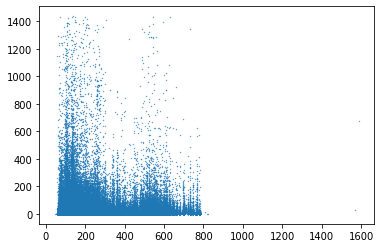

In [12]:
plt.scatter(df['flight duration'],df['Delay'],s=0.1)
plt.show()

In [13]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df)
df = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [14]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
ft = ['Depature Airport', 'Destination Airport']
encoder.fit(df[ft])

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)

In [15]:
def Ordinal_e_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    new_cols = pd.DataFrame(new_feats, dtype=int)
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

In [16]:
df = Ordinal_e_new_features(df, ft, encoder)

In [17]:
df=df.rename(columns={0: 'Depature Airport', 1: 'Destination Airport'})

In [18]:
df.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
0,0,785,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1,144,56
1,2,645,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1,144,68
2,0,770,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1,144,94
3,0,770,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2,144,82
4,9,145,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,165,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
6,0,650,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2,144,68
7,1,340,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,505,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,250,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144


In [19]:
df2=df

In [40]:
df=df2

In [42]:
def removeOutliers(datafframe,feature):

    upper_limit = datafframe[feature].mean() + 3 * datafframe[feature].std()
    lower_limit = datafframe[feature].mean() - 3 * datafframe[feature].std()
    new_train_data = datafframe[(datafframe[feature] < upper_limit) & (datafframe[feature] > lower_limit)]

    return new_train_data

In [43]:
df=removeOutliers(df,'Delay')

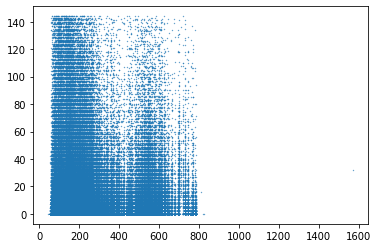

In [44]:
plt.scatter(df['flight duration'],df['Delay'],s=0.1)
plt.show()

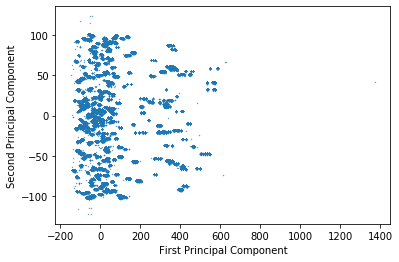

In [45]:
dim_reducer = PCA(n_components=2)
df_reduced = dim_reducer.fit_transform(df)
plt.scatter(df_reduced[:,0],df_reduced[:,1],s=0.1)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

KeyError: 2.0

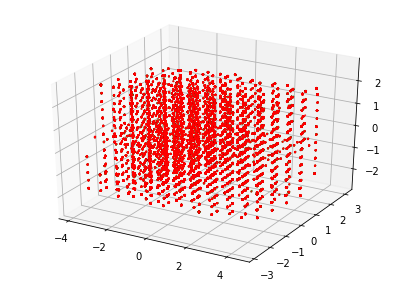

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

X = df.drop('Delay',axis=1)
y = df['Delay']
sc = StandardScaler()

scaler = StandardScaler()
scaler.fit(X) 
X_scaled = scaler.transform(X)

pca = PCA(n_components=3)
pca.fit(X_scaled) 
X_pca = pca.transform(X_scaled) 

ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio


Xax = X_pca[:,0]
Yax = X_pca[:,1]
Zax = X_pca[:,2]

cdict = {0:'red',1:'green'}
labl = {0:'Malignant',1:'Benign'}
marker = {0:'*',1:'o'}
alpha = {0:.3, 1:.5}

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
    ix=np.where(y==l) 
    ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=1,label=labl[l], marker=marker[l], alpha=alpha[l])
# for loop ends
ax.set_xlabel("First Principal Component", fontsize=14)
ax.set_ylabel("Second Principal Component", fontsize=14)
ax.set_zlabel("Third Principal Component", fontsize=14)

ax.legend()
plt.show()

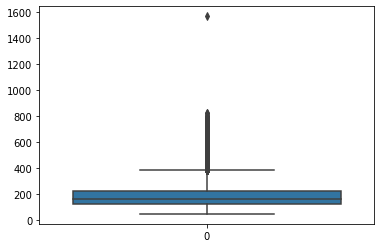

In [47]:
sns.boxplot(data=df['flight duration'])

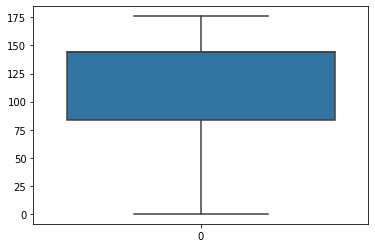

In [48]:
sns.boxplot(data=df['Destination Airport'])

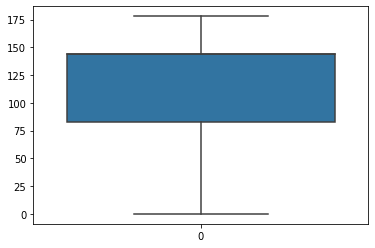

In [49]:
sns.boxplot(data=df['Depature Airport'])

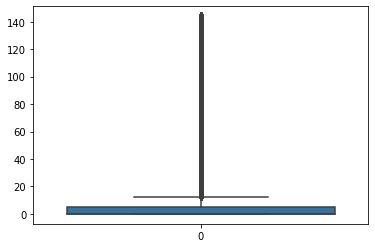

In [50]:
sns.boxplot(data=df['Delay'])

In [51]:
train = df.loc[df['Scheduled depature time_year'] < 2018] 
test = df.loc[df['Scheduled depature time_year'] == 2018]

In [52]:
train.head(10)

,Delay,flight duration,Scheduled depature time_year,Scheduled depature time_month,Scheduled depature time_week,Scheduled depature time_day,Scheduled depature time_houre,Scheduled depature time_min,Scheduled depature time_dow,Scheduled arrival time_year,Scheduled arrival time_month,Scheduled arrival time_week,Scheduled arrival time_day,Scheduled arrival time_houre,Scheduled arrival time_min,Scheduled arrival time_dow,Depature Airport,Destination Airport
0,0,785,2015,10,44,27,7,40,1,2015,10,44,27,20,45,1,144,56
1,2,645,2015,10,44,27,9,50,1,2015,10,44,27,20,35,1,144,68
2,0,770,2015,10,44,27,10,45,1,2015,10,44,27,23,35,1,144,94
3,0,770,2015,10,44,27,12,30,1,2015,10,44,28,1,20,2,144,82
4,9,145,2015,10,44,27,14,15,1,2015,10,44,27,16,40,1,113,144
5,0,165,2015,10,44,27,14,30,1,2015,10,44,27,17,15,1,53,144
6,0,650,2015,10,44,27,14,35,1,2015,10,44,28,1,25,2,144,68
7,1,340,2015,10,44,27,15,40,1,2015,10,44,27,21,20,1,35,144
8,0,505,2015,10,44,27,16,10,1,2015,10,44,28,0,35,2,144,171
9,0,250,2015,10,44,27,16,45,1,2015,10,44,27,20,55,1,156,144


In [53]:
y_test=test['Delay']
x_test=test[['flight duration']]
X_test=test.drop('Delay',axis=1)
y_train=train['Delay']
x_train=train[['flight duration']]
X_train=train.drop('Delay',axis=1)

In [54]:
scaler = RobustScaler()
scaler.fit_transform(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [55]:
x_train=x_train.reshape(-1, 1)
x_test=x_test.reshape(-1,1)

In [56]:
x_train[0:10]

array([[ 5.9047619 ],
       [ 4.57142857],
       [ 5.76190476],
       [ 5.76190476],
       [-0.19047619],
       [ 0.        ],
       [ 4.61904762],
       [ 1.66666667],
       [ 3.23809524],
       [ 0.80952381]])

In [57]:
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[ 1.        ,  5.9047619 , 34.86621315],
       [ 1.        ,  4.57142857, 20.89795918],
       [ 1.        ,  5.76190476, 33.19954649],
       ...,
       [ 1.        ,  0.61904762,  0.38321995],
       [ 1.        ,  4.9047619 , 24.05668934],
       [ 1.        ,  3.42857143, 11.75510204]])

In [58]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [0.         1.4308233  0.02564006]
Intercept:  6.750689676279979


In [59]:
test_x_poly = poly.fit_transform(x_test)
test_y_ = clf.predict(test_x_poly)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_)))
print('R2-score:', r2_score(y_test,test_y_ ) )

Mean Absolute Error: 8.500085230738593
Mean Squared Error: 182.92431652307073
Root Mean Squared Error: 13.524951627383764
R2-score: -0.06912349562366171


Text(0, 0.5, 'Delay')

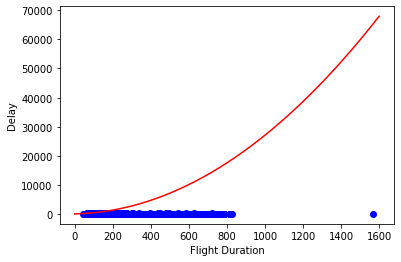

In [60]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue')
XX = np.arange(0.0, 1600.0, 0.1)
yy = clf.intercept_+ clf.coef_[1]*XX+ clf.coef_[2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Flight Duration")
plt.ylabel("Delay")

In [61]:
poly_all = PolynomialFeatures(degree=2)
train_x_poly_all = poly_all.fit_transform(X_train)
train_x_poly_all

array([[ 1.        ,  5.9047619 , 17.61904762, ...,  0.04      ,
         0.20761905,  1.07764172],
       [ 1.        ,  4.57142857, 17.61904762, ...,  0.04      ,
         0.1847619 ,  0.85342404],
       [ 1.        ,  5.76190476, 17.61904762, ...,  0.04      ,
         0.1352381 ,  0.45723356],
       ...,
       [ 1.        ,  0.61904762, 17.63809524, ...,  0.04      ,
         0.19047619,  0.90702948],
       [ 1.        ,  4.9047619 , 17.63809524, ...,  1.09750567,
         0.20952381,  0.04      ],
       [ 1.        ,  3.42857143, 17.63809524, ...,  0.04      ,
         0.13333333,  0.44444444]])

In [62]:
clf_all = linear_model.LinearRegression()
train_y_all = clf_all.fit(train_x_poly_all, y_train)
# The coefficients
print ('Coefficients: ', clf_all.coef_)
print ('Intercept: ',clf_all.intercept_)

Coefficients:  [ 2.38315544e+02 -3.23026756e+04  7.68198251e+04  3.48776740e+07
 -9.36447259e+04  2.97146222e+05 -1.93248929e+06 -3.28950202e+04
  9.80479397e+05 -2.52474707e+06 -3.46353390e+07  6.92585219e+04
 -3.00989595e+05  1.92807118e+06  3.18270685e+04 -9.80088168e+05
  1.48020655e+03  9.82863573e+02  3.12982580e+03 -1.00432345e+04
  5.98571047e+04  1.38321409e+03  5.10755826e+02  3.75581412e+05
  6.25899575e+03  1.03284006e+04  9.92365380e+03 -5.80431150e+04
 -1.66452504e+03 -3.19771426e+03 -3.75587640e+05 -6.25959974e+03
 -9.84468462e+03 -9.08681868e-01  7.01778100e-01 -2.58212691e+07
 -3.20194050e+06 -1.21515444e+07  2.81354112e+05  1.02738836e+06
 -8.90764456e+04  2.85455198e+07  4.26607551e+07  3.47868596e+06
 -1.34046342e+07  8.72055928e+05  3.38715914e+05 -8.95888319e+03
  2.80222741e+07 -1.65910747e+04  2.18762134e+04  4.47830171e+07
 -1.23800933e+07 -5.07088699e+07  3.72819924e+06  5.32219106e+04
 -1.20873607e+03 -2.18338957e+06  4.51099990e+05 -7.95474888e+06
 -5.616536

In [63]:
test_x_poly_all = poly.fit_transform(X_test)
test_y_all = clf_all.predict(test_x_poly_all)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_y_all))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_y_all))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_y_all)))
print('R2-score:', r2_score(y_test,test_y_all ) )

Mean Absolute Error: 20.003155999956558
Mean Squared Error: 465.7683033597233
Root Mean Squared Error: 21.581665907888652
R2-score: -1.7222397005695274


In [64]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(x_test)

Model intercept : 6.76449729935402
Model coefficient : [1.50883736]


In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

Mean Absolute Error: 8.500679384156058
Mean Squared Error: 182.95439431454162
Root Mean Squared Error: 13.52606351879739
R2-score: -0.06929928894720261


Text(0, 0.5, 'Delay')

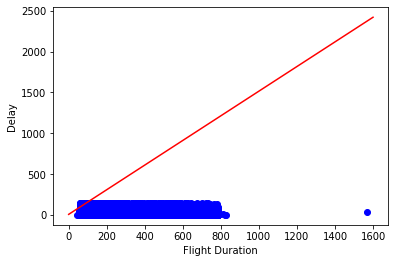

In [66]:
plt.scatter(df['flight duration'], df['Delay'],  color='blue')
XX = np.arange(0.0, 1600.0, 0.1)
yy = regressor.intercept_+ regressor.coef_[0]*XX
plt.plot(XX, yy, '-r' )
plt.xlabel("Flight Duration")
plt.ylabel("Delay")

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

y_pred = regressor.predict(X_test)

Model intercept : -1191.2919068841072
Model coefficients : [ 1.63064054e+00  1.21605906e+04  9.19963985e+02  1.15812967e+00
  3.38014588e+01  1.46862319e+01  1.15158132e+00 -1.03750520e+01
 -1.20905718e+04 -9.18957704e+02  2.91945004e-01 -3.77197017e+01
  4.36641452e+00  3.52736125e-01  1.59641441e+01 -5.73499503e-01
  1.40095466e+00]


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2-score:', r2_score(y_test,y_pred ) )

Mean Absolute Error: 9.188416247831608
Mean Squared Error: 190.75454245908242
Root Mean Squared Error: 13.811391764014314
R2-score: -0.11488820686245482


184.48043159194316
184.35806224453304
183.4991052375422
183.25035657265124
183.1463038411855
183.05579884370619
182.97884158021344
182.8194772873851
182.57682102157568


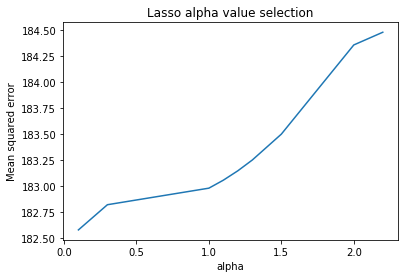

Best value of alpha: 0.1


In [69]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Lasso alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

182.95438991660714
182.95439031641564
182.95439131594011
182.9543917157512
182.95439191565706
182.95439211556308
182.9543923154693
182.9543937148179
182.95439411463346


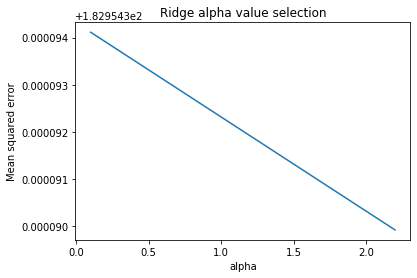

Best value of alpha: 2.2


In [70]:
alphas = [2.2, 2, 1.5, 1.3, 1.2, 1.1, 1, 0.3, 0.1]
losses = []
for alpha in alphas:
    # Write (5 lines): create a Lasso regressor with the alpha value.
    # Fit it to the training set, then get the prediction of the validation set (x_val).
    # calculate the mean sqaured error loss, then append it to the losses array
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred = ridge.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    print(mse)
    losses.append(mse)
plt.plot(alphas, losses)
plt.title("Ridge alpha value selection")
plt.xlabel("alpha")
plt.ylabel("Mean squared error")
plt.show()

best_alpha = alphas[np.argmin(losses)]
print("Best value of alpha:", best_alpha)

In [73]:
model2 = Sequential()
model2.add(Dense(32, input_dim=17, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='relu'))
model2.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['accuracy'])

In [74]:
model2.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
492816/492816 [==============================] - 15s 30us/sample - loss: 7.2189 - acc: 0.5085
Epoch 2/5
492816/492816 [==============================] - 15s 30us/sample - loss: 7.2189 - acc: 0.5085
Epoch 3/5
492816/492816 [==============================] - 15s 30us/sample - loss: 7.2189 - acc: 0.5085
Epoch 4/5
492816/492816 [==============================] - 15s 30us/sample - loss: 7.2189 - acc: 0.5085
Epoch 5/5
492816/492816 [==============================] - 15s 30us/sample - loss: 7.2189 - acc: 0.5085


In [75]:
predicted = model2.predict(X_test, batch_size=128)

In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R2-score:', r2_score(y_test,predicted ) )

Mean Absolute Error: 3.5606655802384424
Mean Squared Error: 183.77580124081538
Root Mean Squared Error: 13.556393371424988
R2-score: -0.07410010198857053
